### 9.9 Notes
### Training Data Adjustments
- Adding in more data to the training dataset from a different patient

### Questions / Considerations
- What types of scaling / normalizaiton should we do to put these data sets on the same scale?

### Notes
- Bringing in more data from another subject does not appear to have improved the model

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

In [11]:
Sub_1 = pd.read_csv('fbdh1.csv')
Sub_2 = pd.read_csv('fbdh3.csv')

In [14]:
Sub_2.count()

Flow    3779
D1      3779
D2      3779
P1      3779
P2      3779
dD1     3779
dD2     3779
dP1     3779
dP2     3779
dtype: int64

### EDA on both Subject Datasets

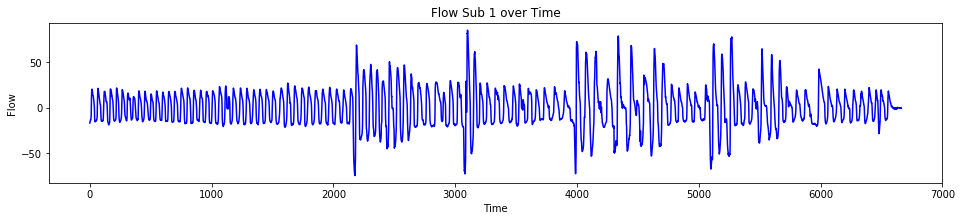

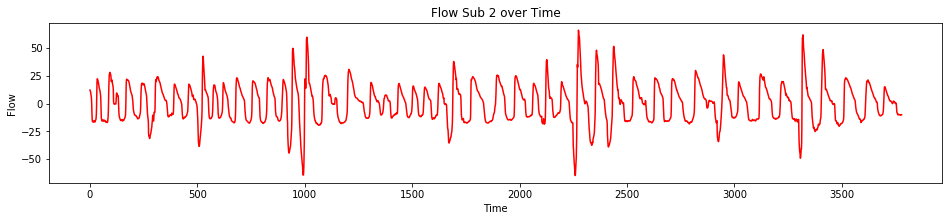

In [17]:
time_1 = range(0, 6664)
time_2 = range(0, 3779)
flow_1 = Sub_1['Flow']
flow_2 = Sub_2['Flow']

fig = plt.figure(figsize = (16, 10))
plt.subplot(3,1,1)
plt.plot(time_1, flow_1, 'b')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow Sub 1 over Time')
plt.show()

fig = plt.figure(figsize = (16, 10))
plt.subplot(3, 1, 2)
plt.plot(time_2, flow_2, 'r')
plt.xlabel('Time')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow Sub 2 over Time')
plt.show()

### Combine Datasets

In [170]:
del df

In [171]:
df = pd.concat([Sub_1, Sub_2])

In [172]:
df.shape

(10443, 9)

In [173]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68


### Scale and Create Feature Matrices

In [174]:
# Use a label fix function to assign classifications or ground truth to Flow thresholds
def label_fix(label):
    if label < -7.5:
        return 0
    elif label > 7.5:
        return 1
    else:
        return 2

df['Class'] = df['Flow'].apply(label_fix)

In [175]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21,0
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91,0
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26,0
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37,0
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68,0


In [176]:
df.shape

(10443, 10)

In [177]:
# Create the Feature Matrix and Scale Features
X = df.drop('Flow', axis = 1)
X.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns = X.columns[:])

# Create the classification matrix
y = df['Class']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

columns = ['D1', 'D2', 'P1', 'P2', 'dD1', 'dD2', 'dP1', 'dP2']

In [178]:
X.shape

(10443, 8)

In [179]:
del model

In [180]:
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.35))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 150)               1350      
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                7550      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 153       
Total params: 9,053
Trainable params: 9,053
Non-trainable params: 0
_________________________________________________________________


In [181]:
EPOCHS = 40

model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/40
7310/7310 [==============================] - 0s 47us/sample - loss: 0.6167 - acc: 0.7650
Epoch 2/40
7310/7310 [==============================] - 0s 29us/sample - loss: 0.4711 - acc: 0.8237
Epoch 3/40
7310/7310 [==============================] - 0s 31us/sample - loss: 0.4301 - acc: 0.8442
Epoch 4/40
7310/7310 [==============================] - 0s 31us/sample - loss: 0.4178 - acc: 0.8450
Epoch 5/40
7310/7310 [==============================] - 0s 29us/sample - loss: 0.4032 - acc: 0.8527
Epoch 6/40
7310/7310 [==============================] - 0s 29us/sample - loss: 0.3871 - acc: 0.8561
Epoch 7/40
7310/7310 [==============================] - 0s 28us/sample - loss: 0.3808 - acc: 0.8531
Epoch 8/40
7310/7310 [==============================] - 0s 30us/sample - loss: 0.3747 - acc: 0.8561
Epoch 9/40
7310/7310 [==============================] - 0s 27us/sample - loss: 0.3677 - acc: 0.8569
Epoch 10/40
7310/7310 [==============================] - 0s 29us/sample - loss: 0.3625 - acc: 0.8579

In [182]:
# Scoring the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

3133/3133 [==============================] - 0s 27us/sample - loss: 0.2976 - acc: 0.8781
Test accuracy: 0.87807214
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1297
           1       0.90      0.91      0.91      1206
           2       0.73      0.75      0.74       630

   micro avg       0.88      0.88      0.88      3133
   macro avg       0.85      0.86      0.86      3133
weighted avg       0.88      0.88      0.88      3133



### Test on New Dataset

In [183]:
# Read in dataframe
test = pd.read_csv('test_data_2.csv')
test['Class'] = test['Flow'].apply(label_fix)

# Create the Feature Matrix and Scale Features
X_1 = test.drop('Flow', axis = 1)
X_1.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X_1)
scaled_features = scaler.transform(X_1)
X_1 = pd.DataFrame(scaled_features, columns = X_1.columns[:])

# Create the classification matrix
y_1 = test['Class']

loss, acc = model.evaluate(X_1, y_1)
print('Test accuracy:', acc)

test_predictions = model.predict(X_1)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))
    
print(classification_report(y_1, final_pred_test))

5019/5019 [==============================] - 0s 14us/sample - loss: 0.5073 - acc: 0.8382
Test accuracy: 0.83821476
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2145
           1       0.89      0.84      0.86      2074
           2       0.67      0.68      0.68       800

   micro avg       0.84      0.84      0.84      5019
   macro avg       0.81      0.81      0.80      5019
weighted avg       0.84      0.84      0.84      5019

